<a href="https://colab.research.google.com/github/ldsAS/Tibame-AI-Learning/blob/main/Tibame20250623_AutoML_%E5%BB%BA%E7%AB%8B%E6%A8%A1%E5%9E%8B(HousePrice)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Clement Chen</br>
E-Mail: clement1972@gmail.com</br>
https://sites.google.com/site/clement1972/</br>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [35]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = 'root_mean_squared_error'

# data_filename 訓練用資料的檔名
data_filename = '/dataset/HousePrice_train.csv'

# prediction_filename 模型預測結果的檔名
prediction_filename = '/output/HousePrice_test.csv'

# model_path 模型儲存資料夾
model_path = '/output/model_HousePrice'

# leaderboard_filename 模型評比結果檔名
leaderboard_filename = '/output/leaderboard_HousePrice.csv'

In [37]:
import pandas as pd
data = pd.read_csv('../content/drive/MyDrive/dataset/HousePrice_test.csv')
print(data.columns)
print(data.shape)
print(data.head())
print(data.describe())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [38]:
# input_field 模型輸入的欄位名稱
input_field = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

# target_field 模型預測欄位名稱
target_field = 'SalePrice'

### 環境設定

In [24]:
# 檢查執行環境是不是Colab
# 若在本地端環境，建議建立新的venv環境來蹄autogluon
environment_type = 1
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon
    ! sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
    ! pip install pygraphviz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04.1).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


### 載入資料

In [39]:
import pandas as pd
import numpy as np

In [40]:
data = pd.read_csv(environment_base_folder+data_filename)
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1164,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1165,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1166,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950


### <font color='blue'>顯示資料表欄位名稱</font>

In [41]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 訓練模型

In [42]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
working_field = input_field.copy()
working_field.append(target_field)
model = TabularPredictor(label=target_field, eval_metric=eval_metric, path=environment_base_folder+model_path).fit(train_data=data[working_field],num_bag_folds=5)

### <font color='blue'>最佳模型名稱</font>

In [ ]:
model.get_model_best()

'WeightedEnsemble_L2'

### <font color='blue'>預測問題種類</font>

In [ ]:
model.problem_type

'binary'

### <font color='blue'>評估指標</font>

In [ ]:
model.eval_metric

roc_auc

### <font color='blue'>使用的演算法</font>

In [ ]:
model.get_model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'XGBoost_BAG_L1',
 'NeuralNetTorch_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2']

### <font color='blue'>leaderboard</font>

In [ ]:
leaderboard = model.leaderboard(extra_info=True, silent=True)
leaderboard.to_excel(environment_base_folder+leaderboard_filename)
model.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.859908,1.515893,170.652337,0.000823,0.843994,2,True,14
1,LightGBMXT_BAG_L1,0.830906,0.125000,28.641330,0.125000,28.641330,1,True,3
2,CatBoost_BAG_L1,0.830596,0.067219,29.691368,0.067219,29.691368,1,True,7
3,NeuralNetTorch_BAG_L1,0.830075,0.238234,37.653987,0.238234,37.653987,1,True,12
4,ExtraTreesEntr_BAG_L1,0.824087,0.183712,0.879143,0.183712,0.879143,1,True,9
5,ExtraTreesGini_BAG_L1,0.822933,0.271544,1.022633,0.271544,1.022633,1,True,8
6,RandomForestEntr_BAG_L1,0.812057,0.378824,2.091116,0.378824,2.091116,1,True,6
7,XGBoost_BAG_L1,0.804471,0.079089,10.961620,0.079089,10.961620,1,True,11
8,RandomForestGini_BAG_L1,0.804164,0.315840,1.914062,0.315840,1.914062,1,True,5
9,LightGBM_BAG_L1,0.798847,0.054007,13.179917,0.054007,13.179917,1,True,4


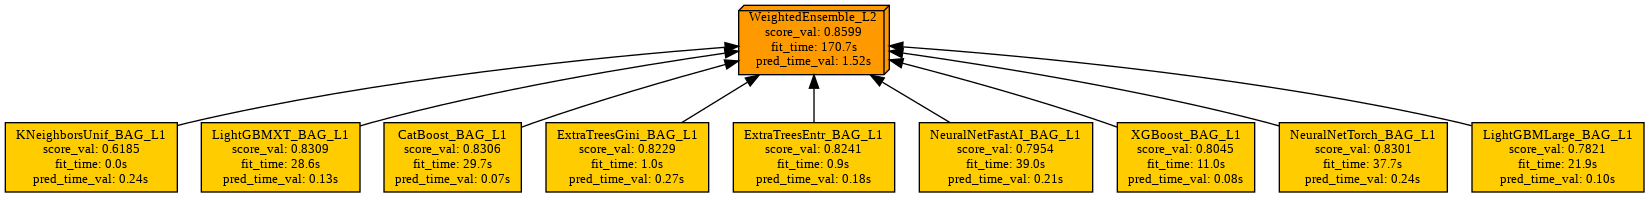

In [ ]:
if environment_type == 1:
  path_to_png = model.plot_ensemble_model()
  from IPython.display import Image, display
  display(Image(filename=path_to_png))

# 輸出預測結果

In [ ]:
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [ ]:
pred_data = data.copy()
pred_data['預測結果'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_excel(environment_base_folder+prediction_filename)

# 儲存模型

In [ ]:
import pickle

result = {}
result['input_field'] = input_field
result['target_field'] = target_field

with open(environment_base_folder+model_path+'/used_field.bin', 'wb') as handle:
    pickle.dump(result, handle)

In [ ]:
model.save()

TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/gdrive/MyDrive/output/model_人員資料/")


# 欄位重要性

In [ ]:
model.feature_importance(data)

These features in provided data are not utilized by the predictor and will be ignored: ['是否為成年人(Over18)', '標準工作時間(StandardHours)']
Computing feature importance via permutation shuffling for 31 features using 1176 rows with 5 shuffle sets...
	265.89s	= Expected runtime (53.18s per shuffle set)
	96.72s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
加班(OverTime),0.047567,0.004157,0.000007,5,0.056125,0.039008
過去工作公司家數(NumCompaniesWorked),0.007802,0.001562,0.000183,5,0.011018,0.004586
月收入(MonthlyIncome),0.006116,0.001164,0.000150,5,0.008512,0.003721
股票選擇權等級(StockOptionLevel),0.005702,0.001132,0.000177,5,0.008033,0.003372
工作滿意度(JobSatisfaction),0.005175,0.001398,0.000581,5,0.008054,0.002297
通勤距離(DistanceFromHome),0.005118,0.000587,0.000020,5,0.006326,0.003909
在該職等工作年資(YearsSinceLastPromotion),0.004498,0.000725,0.000078,5,0.005990,0.003005
月費率(MonthlyRate),0.004139,0.000687,0.000088,5,0.005554,0.002723
工作環境滿意度(EnvironmentSatisfaction),0.003816,0.000588,0.000066,5,0.005027,0.002606
出差頻率(BusinessTravel),0.003000,0.000420,0.000045,5,0.003865,0.002136
